<span style="font-family:Calibri">

---

# 🔥❄️ **Simulated Annealing Algorithm**

### *Introduction to Artificial Intelligence*  
*2024/2025*

**Universidad de Deusto**  
*Valle Varo*

---

## 📖 **Introduction**
Simulated Annealing is an optimization algorithm inspired by the annealing process in metallurgy 🛠️, where a material is heated 🔥 and then slowly cooled ❄️ to remove defects and minimize its energy ⚡. The algorithm mimics this process to explore the search space of a problem, allowing for both exploration and exploitation by occasionally accepting worse solutions to escape local optima.

It is particularly useful for solving **combinatorial optimization problems**, where the search space is large and there are many local optima .

---

## 🧠 **Key Concepts**

1. **Objective Function**: The function we aim to optimize. 📊
2. **Temperature (T)**: A control parameter that starts high 🌡️ and gradually decreases ⬇️. Higher temperatures allow more exploration by accepting worse solutions, while lower temperatures favor exploitation.
3. **Neighboring State**: A state close to the current state that can be reached by a small modification 🔄.
4. **Acceptance Probability**: A function that determines the likelihood of accepting a worse solution, based on the current temperature and the difference in the objective function 🎲.

## 🧪 **Metropolis Acceptance Criterion**

The **Metropolis acceptance criterion** is a key component of the **Simulated Annealing** algorithm that governs whether or not to accept a new solution, especially if it is worse than the current one. This criterion was first introduced in the **Metropolis algorithm**, which inspired the simulated annealing approach.

### 🎯 **How It Works**:
1. **If the new solution is better** than the current solution, the algorithm **accepts it immediately**.
2. **If the new solution is worse**, it is accepted with a probability that depends on two factors:
   - **The difference in the objective function values** between the current solution and the new one (often referred to as ΔE).
   - **The current temperature (T)**, which controls how "forgiving" the algorithm is when accepting worse solutions.

The acceptance probability for a worse solution is calculated using the following formula:

### 🔢 **Formula**:

> $$P(\Delta E, T) = e^{-\frac{\Delta E}{T}}$$

Where:
- $\Delta E$ is the change in the objective function value between the current solution and the neighboring solution.
- **$T$** is the current temperature.

### 📊 **Explanation**:
- When  $\Delta E$ (the difference in the objective function) is small, or the temperature $T$ is high, the probability $P(\Delta E, T)$ will be closer to 1. This means there is a good chance of accepting the worse solution.
- As the temperature  $T$ decreases, or as $\Delta E$ becomes larger (worse solutions), the probability  $P(\Delta E, T)$ drops, making it less likely that the worse solution will be accepted.
  
### 🔑 **Why Is It Important?**
The Metropolis criterion enables **exploration** in the search space by allowing the algorithm to occasionally accept worse solutions. This helps the algorithm escape local optima and potentially find the global optimum. As the temperature decreases over time (according to the cooling schedule), the algorithm becomes less likely to accept worse solutions, focusing more on **exploitation** of the best-found region.

This balance between exploration and exploitation is the key to the success of **Simulated Annealing** in solving complex optimization problems! 🎉

---


## 📝 **Pseudocode for Simulated Annealing**

```java
1. Initialize current_solution with a random initial solution. 
2. Set an initial temperature T. 
3. Repeat until stopping condition is met: 
   a. Generate a neighboring state. 
   b. Calculate the change in objective function (ΔE) between the current solution and the neighborh. 
   c. IF the neighboring state is better, move to it. 
   d. IF the neighboring state is worse, move to it with a probability P(ΔE, T) = exp(-ΔE / T). 
   e. Decrease the temperature according to a cooling schedule. (we choose this)
4. Return the current solution as the best found. 
```


---

In [1]:
# import libraries
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt

In [2]:
# objective function
def objective(x):
	return x[0]**2.0

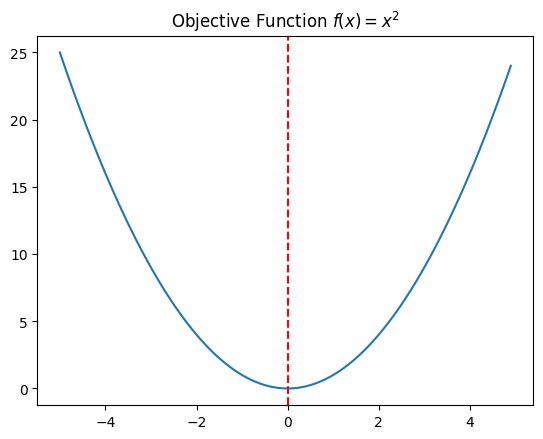

In [3]:
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
plt.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
plt.axvline(x=x_optima, ls='--', color='red')
# show the plot
plt.title('Objective Function $f(x) = x^2$')
plt.show()

In [4]:
# explore temperature vs algorithm iteration for simulated annealing
# total iterations of algorithm
iterations = 10
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations according to cooling schedule
temperatures = [initial_temp/float(i + 1) for i in iterations]

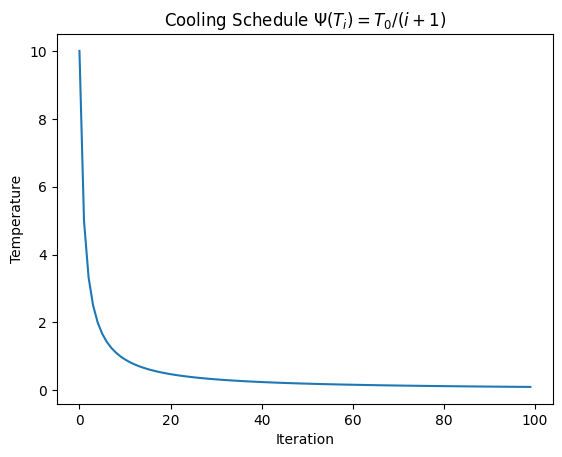

In [20]:
# plot iterations vs temperatures
plt.plot(iterations, temperatures)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Cooling Schedule $ \Psi (T_{i}) = T_{0}/(i+1)$')
plt.show()

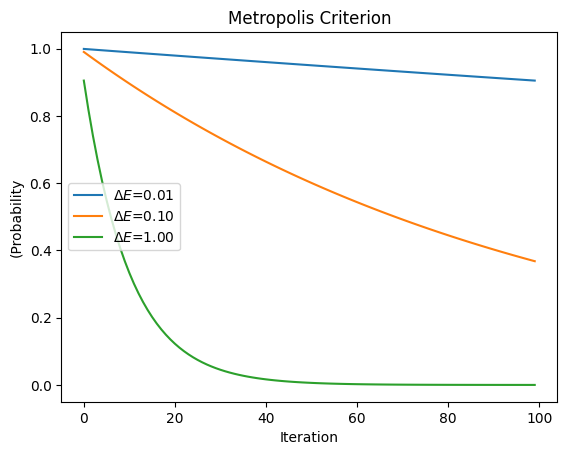

In [5]:
# explore metropolis acceptance criterion for simulated annealing
from math import exp
# total iterations of algorithm
iterations = 100
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# metropolis acceptance criterion
differences = [0.01, 0.1, 1.0]
for d in differences:
	prob = [exp(-d/t) for t in temperatures]
	# plot iterations vs metropolis
	label = '$\Delta E$=%.2f' % d
	plt.plot(iterations, prob, label=label)
# inalize plot
plt.xlabel('Iteration')
plt.ylabel('(Probability')
plt.title('Metropolis Criterion')
plt.legend()
plt.show()

--- 
**Example:**

In [6]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

In [7]:
# objective function
def objective2(x):
	return np.tanh(x)**2

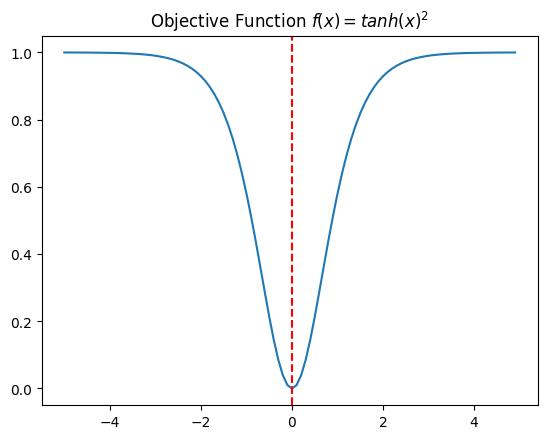

In [8]:
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = [objective2([x]) for x in inputs]
# create a line plot of input vs result
plt.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
plt.axvline(x=x_optima, ls='--', color='red')
# show the plot
plt.title('Objective Function $f(x) = tanh(x)^2$')
plt.show()

In [9]:

# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval
	scores = list()
	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# keep track of scores
			scores.append(best_eval)
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval, scores]

>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
Done!
f([-0.02854417]) = 0.000815


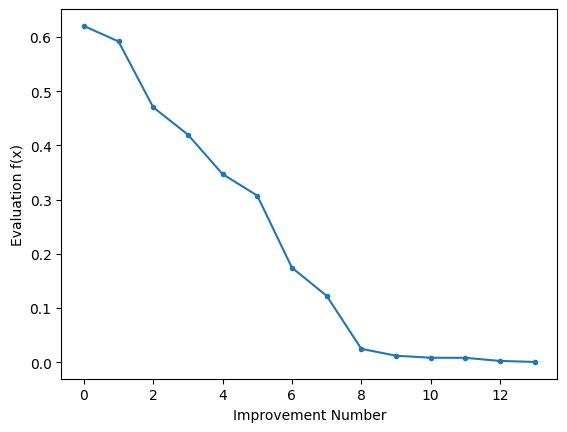

In [10]:
# random number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 100
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

# line plot of best scores
plt.plot(scores, '.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')
plt.show()

## 📚 **Bibliography**

1. **Kirkpatrick, S., Gelatt, C. D., & Vecchi, M. P.** (1983). Optimization by Simulated Annealing. *Science*, 220(4598), 671-680. [DOI:10.1126/science.220.4598.671](https://doi.org/10.1126/science.220.4598.671)

2. **Cerny, V.** (1985). Thermodynamical Approach to the Traveling Salesman Problem: An Efficient Simulation Algorithm. *Journal of Optimization Theory and Applications*, 45(1), 41-51. [DOI:10.1007/BF00941131](https://doi.org/10.1007/BF00941131)

3. **Szu, H., & Hartley, R.** (1987). Fast Simulated Annealing. *Physica A: Statistical Mechanics and its Applications*, 138(3), 536-545. [DOI:10.1016/0378-4371(87)90153-5](https://doi.org/10.1016/0378-4371(87)90153-5)

4. **Laarhoven, P. J. M., & Aarts, E. H. L.** (1987). Simulated Annealing: Theory and Applications. *Mathematics and Its Applications*, 37, 1-66. 

5. **Basu, A., & Ghosh, A.** (2012). Simulated Annealing: A Review. *International Journal of Computer Applications*, 47(14), 1-5. [DOI:10.5120/7112-0153](https://doi.org/10.5120/7112-0153)

6. **Aarts, E., & Korst, J.** (1989). Simulated Annealing and Boltzmann Machines. *Wiley Series in Probability and Mathematical Statistics*. Wiley.

7. **Russell, S., & Norvig, P.** (2020). *Artificial Intelligence: A Modern Approach*. 4th Edition. Pearson Education. 

8. **Geman, S., & Geman, D.** (1984). Stochastic Relaxation, Gibbs Distributions, and the Bayesian Restoration of Images. *IEEE Transactions on Pattern Analysis and Machine Intelligence*, 6(6), 721-741. [DOI:10.1109/TPAMI.1984.4767596](https://doi.org/10.1109/TPAMI.1984.476


---